In [1]:
# Importo librerias y defino configuraciones

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')  # Cambio el estilo de los graficos

sns.set(style="whitegrid")

In [2]:
tipos = {"advertiser_id":"category"}

In [3]:
clicks = pd.read_csv("../../data/clicks.csv.gzip", compression="gzip", dtype=tipos)
installs = pd.read_csv("../../data/installs.csv.gzip", compression="gzip")

## Verificamos la integridad del set de datos

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null category
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), category(1), float64(11), int64(5), object(2)
memory u

In [5]:
clicks.dtypes

advertiser_id      category
action_id           float64
source_id             int64
created              object
country_code          int64
latitude            float64
longitude           float64
wifi_connection        bool
carrier_id          float64
trans_id             object
os_minor            float64
agent_device        float64
os_major            float64
specs_brand           int64
brand               float64
timeToClick         float64
touchX              float64
touchY              float64
ref_type              int64
ref_hash              int64
dtype: object

In [6]:
clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

In [7]:
clicks.isnull().all()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id         False
trans_id           False
os_minor           False
agent_device       False
os_major           False
specs_brand        False
brand              False
timeToClick        False
touchX             False
touchY             False
ref_type           False
ref_hash           False
dtype: bool

In [8]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [9]:
clicks["action_id"].isnull().all()

True

#### La columna de action_id es completamente nula, la podemos descartar.

In [10]:
clicks = clicks.drop("action_id", axis=1)

In [11]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
8980,3,0,2019-03-07T22:57:33.299Z,6333597102633388268,1.208059,1.069624,False,6.0,TzrAasiuPGs-JYatAGbVtBba9LIXD_4,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,9.872,0.938,0.658,1891515180541284343,4768064919299788368
642,3,0,2019-03-08T00:03:08.814Z,6333597102633388268,1.205689,1.070234,False,12.0,2sXCT-SC9CQdlMGsXp20CU4X-8YrzRM,3.378640e+18,NaN,4.566454e+18,392184377613098015,2.0,NaN,NaN,NaN,1891515180541284343,3238454241288349811
17546,3,0,2019-03-10T05:36:32.552Z,6333597102633388268,1.205689,1.070234,False,4.0,JX0mZrMMiffG2gEXCiOuhCW00gOI7wE,6.666626e+17,NaN,1.563830e+18,392184377613098015,NaN,53.519,0.123,0.998,1891515180541284343,5560826973167019126
26277,3,1,2019-03-12T23:13:49.625Z,6333597102633388268,1.205689,1.070234,False,1.0,KENSSibt3Kp46xDPUB6coWIF0LP5jWk,4.106890e+18,NaN,5.745805e+18,2733035977666442898,NaN,9.896,0.615,0.372,1891515180541284343,6326667460330992018
5549,3,1,2019-03-09T06:15:29.012Z,6333597102633388268,1.205689,1.070234,False,2.0,WD8B-4He00wWe6UDCu6Mz3A_mZldKak,3.025219e+18,NaN,1.774085e+18,2733035977666442898,NaN,82.181,0.904,0.841,1891515180541284343,7815449459536561205


In [12]:
clicks["wifi_connection"].any()

False

#### Todas las filas tienen a False como valor de la columna wifi_connection, por lo que no nos aporta mucho al analisis. #TODO

In [13]:
clicks.describe()

,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18
std,2.188948,1.024019e+03,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18
min,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18
50%,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18
75%,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18
max,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


## 1) Caracteristicas y proveniencia de los clicks

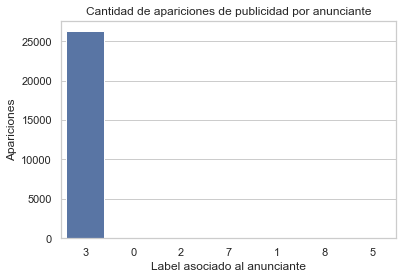

In [14]:
g = sns.countplot(x='advertiser_id', data=clicks, order=clicks['advertiser_id']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de clicks de publicidad por anunciante");

Podemos ver que el anunciante 3 es quien muestra la gran mayoria de las publicidades.

#### Vemos como se distribuye la cantidad de apariciones entre los demas anunciantes, sin incluir al anunciante 3

In [15]:
clicks_anunciante_amplificado = clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts()

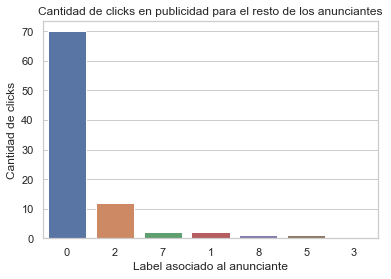

In [16]:
g = sns.countplot(x='advertiser_id', data=clicks[-clicks["advertiser_id"].isin(['3'])], order=\
                  clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Cantidad de clicks")
g.set_title("Cantidad de clicks en publicidad para el resto de los anunciantes");  # O sea omito el anunciante 3

In [17]:
clicks["ref_type"].value_counts()  # ¿Deberian ser dos? (Apple o Android) REVISAR

1891515180541284343    25549
1494519392962156891      739
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

In [18]:
clicks["brand"].value_counts()

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

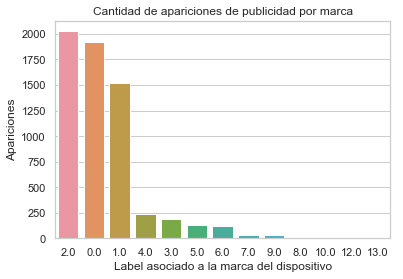

In [19]:
g = sns.countplot(x='brand', data=clicks, order=clicks['brand']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado a la marca del dispositivo")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de publicidad por marca");

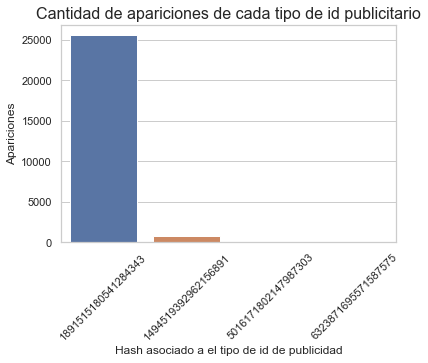

In [20]:
g = sns.countplot(x='ref_type', data=clicks, order=clicks['ref_type']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Hash asociado a el tipo de id de publicidad")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de cada tipo de id publicitario", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=45);


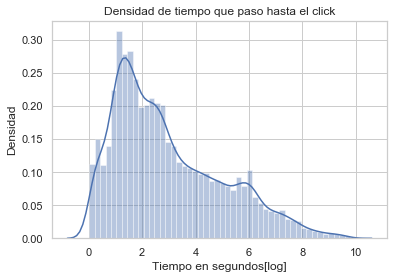

In [21]:
g = sns.distplot(np.log(clicks["timeToClick"].dropna() + 1))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos[log]")
g.set_ylabel("Densidad");

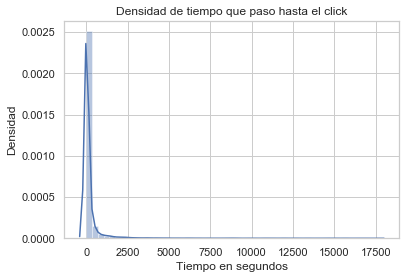

In [22]:
g = sns.distplot(clicks["timeToClick"].dropna())
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos")
g.set_ylabel("Densidad");

# VER CUAL DE LOS TRES GRAFICOS USAR

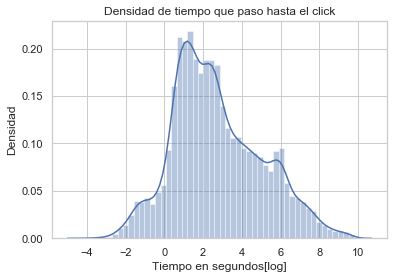

In [23]:
g = sns.distplot(np.log(clicks["timeToClick"].dropna()))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos[log]")
g.set_ylabel("Densidad");

#### Convierto a milisegundos para poder graficar mejor en escala logaritmica (asi no tengo que lidiar con valores negativos en los ejes, queda raro).

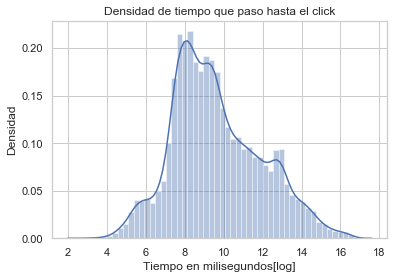

In [24]:
g = sns.distplot(np.log((clicks["timeToClick"].dropna())*1000 + 1))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en milisegundos[log]")
g.set_ylabel("Densidad");

Ver de relacionar:
- Tiempo vs si fue install o no (al parecer es un quilombo porque no hay una forma obvia de relacionar el archivo de installs y el de clicks, ver celda de abajo)
- Posicion de la pantalla donde hizo click con si fue install o no ( idem anterior, deberia poder relacionar los dos archivos)
- Latitude y longitud vs cantidad de clicks ( con un heatmap?)

In [25]:
# Tiempo vs si fue install o no 
# Que miseria che, solo 5 filas quedan haciendo merge
df_i = installs.groupby("ref_hash").filter(lambda x: len(x) == 1)
df_c = clicks[["ref_hash", "timeToClick"]].dropna().groupby("ref_hash").mean()
pd.merge(df_i, df_c, how='inner', on=["ref_hash"])

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,timeToClick
0,2019-03-06 21:33:40.647,7,1891515180541284343,582930240149217282,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,7140852032740295638,3.301378e+18,2.2770
1,2019-03-08 00:30:02.714,7,1891515180541284343,3685364020547088390,NaN,False,True,2970470518450881158,NaN,2.007085e+18,adjust.com,NaN,3212f574-d085-43d8-9f44-c39e0b0dbdfb,app_open,NaN,NaN,4682734745018418779,3.301378e+18,5859.8940
2,2019-03-08 14:10:39.335,7,1891515180541284343,7759178785240189555,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18,17.9015
3,2019-03-11 09:38:31.388,7,1891515180541284343,7190737170444985036,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,7503733330765163556,3.301378e+18,108.8350
4,2019-03-10 08:30:15.346,7,1891515180541284343,2369915544093215150,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8945813689569211960,3.301378e+18,0.0950


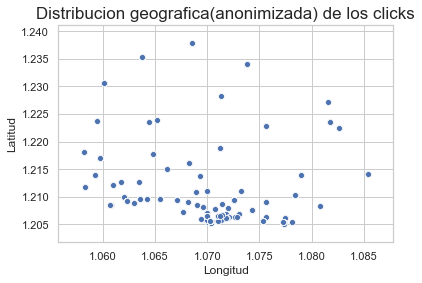

In [26]:
g = sns.scatterplot(x="longitude", y="latitude", data=clicks)
g.set_title("Distribucion geografica(anonimizada) de los clicks", fontsize=17)
g.set_xlabel("Longitud")
g.set_ylabel("Latitud");

#### El grafico nos muestra un distribucion de clicks tal que pareceria haber una mayor concentracion en las longitudes 1.070-1.073 y latitudes 1.205-1.207, junto con una distribucion de varios puntos a la largo del resto del mapa.

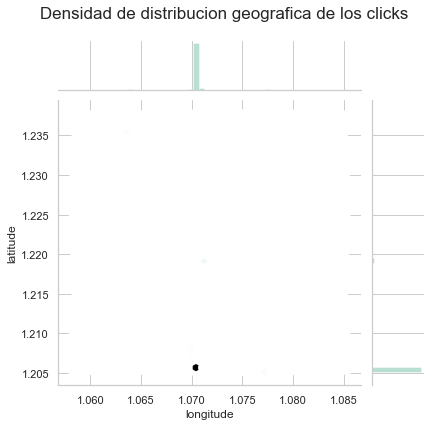

In [27]:
g = sns.jointplot("longitude", "latitude",data=clicks, kind="hex", color="#4CB391")
plt.subplots_adjust(top=0.9)
plt.suptitle("Densidad de distribucion geografica de los clicks", fontsize = 17);

#### Sin embargo si realizamos un grafico de densidad bidimensional podemos ver la gran diferencia de magnitud que hay entre las coordenadas antes mencionadas y el resto del mapa, la inmensa mayoria de los clicks se encuentran en las longitudes 1.070-1.071 y en las latitudes 1.205-1.206

In [28]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
5453,3,0,2019-03-09T01:12:52.590Z,6333597102633388268,1.205689,1.070234,False,3.0,9NMM_BZHAsB9l151zmu_CKaSN1pfC0Q,3.378640e+18,NaN,4.566454e+18,392184377613098015,2.0,148.983,0.522,2.704,1891515180541284343,1186834865828672193
23830,3,6,2019-03-12T21:44:12.799Z,6333597102633388268,1.205689,1.070234,False,13.0,ZADWin8YYUX0_XADkE5mcFAx88f2lMM,3.378640e+18,NaN,4.566454e+18,2733035977666442898,NaN,25.683,0.981,0.024,1891515180541284343,2161849021063988604
9721,3,0,2019-03-07T22:54:45.703Z,6333597102633388268,1.205689,1.070234,False,0.0,xO965euSiPykgjbMY5fBsaZDH8fsRs8,3.378640e+18,NaN,4.566454e+18,392184377613098015,5.0,171.201,0.931,0.463,1891515180541284343,1808048940249324734
555,3,5,2019-03-07T23:38:46.614Z,6333597102633388268,1.205689,1.070234,False,15.0,8elMcxh6BmUxcBxZxCtoDyf4KQaEKyk,3.511538e+18,NaN,1.774085e+18,2733035977666442898,NaN,2.625,0.889,0.043,1891515180541284343,8609941268181947497
17942,3,6,2019-03-13T18:30:15.758Z,6333597102633388268,1.205689,1.070234,False,13.0,R1N7MZatJHi5cTNZ5sazWKV0W7MFMKg,3.378640e+18,1.754528e+18,4.566454e+18,2733035977666442898,NaN,3.200,0.944,0.079,1891515180541284343,130956745151649115


In [29]:
clicks['touchXCategorico'] = pd.cut(clicks['touchX'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clicks['touchYCategorico'] = pd.cut(clicks['touchY'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16.60], include_lowest=True,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [30]:
clicks['actividad'] = 1
for_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='actividad', aggfunc='sum')

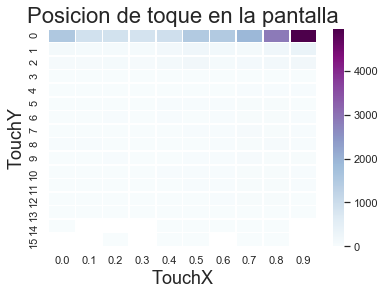

In [31]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Posicion de toque en la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [32]:
timeToClick_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='timeToClick')

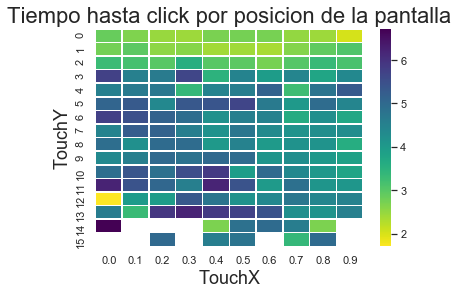

In [49]:
g = sns.heatmap(timeToClick_heatmap, linewidths=.5, cmap="viridis_r") # annot=True
g.set_title("Tiempo hasta click por posicion de la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [34]:
len(clicks[(clicks["timeToClick"] < 150) & (clicks["timeToClick"] > 0)])

18763

In [35]:
clicks["timeToClickLog"] = np.log(clicks["timeToClick"])

In [36]:
clicks_con_ventana_de_timetoclick = clicks[(clicks["timeToClick"] < 100) & (clicks["timeToClick"] > 0)]

In [37]:
timeToClick_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='timeToClickLog')

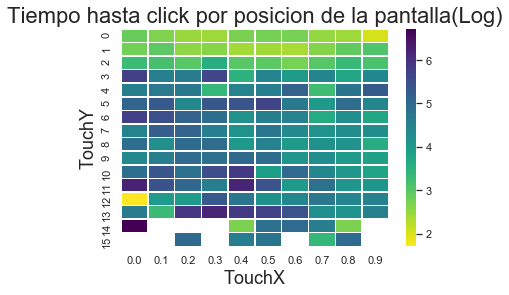

In [50]:
g = sns.heatmap(timeToClick_heatmap, linewidths=.5, cmap="viridis_r") # annot=True
g.set_title("Tiempo hasta click por posicion de la pantalla(Log)", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [41]:
clicks["created"] = clicks["created"].astype("datetime64")


In [42]:
clicks.set_index("created", inplace=True)

In [43]:
clicks.sort_index()

,advertiser_id,source_id,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,...,brand,timeToClick,touchX,touchY,ref_type,ref_hash,touchXCategorico,touchYCategorico,actividad,timeToClickLog
created,,,,,,,,,,,,,,,,,,,,,
2019-03-05 02:22:03.191,2,3,6333597102633388268,1.235406,1.063737,False,45.0,9AFIc1hsLwyFGInoYold2QAiHW3JB80,6.768137e+18,NaN,...,NaN,183.190,0.068,0.432,1891515180541284343,4368617728156436525,0.0,0,1,5.210524
2019-03-05 02:33:41.204,0,5,6333597102633388268,1.205689,1.070234,False,13.0,vvcM1mPFDKFaIse_0mOUno9zLsQuH0c,3.025219e+18,NaN,...,NaN,8.274,0.859,1.055,1891515180541284343,6443314382786145865,0.8,1,1,2.113118
2019-03-05 06:03:05.493,2,3,6333597102633388268,1.205689,1.070234,False,45.0,--T8POKmq6VJRpFZAAncMHCIaT8cB-0,6.768137e+18,NaN,...,NaN,57.733,0.050,0.463,1891515180541284343,4368617728156436525,0.0,0,1,4.055829
2019-03-05 19:11:45.452,2,3,6333597102633388268,1.205689,1.070234,False,45.0,jGkV_0Y1BxHJgNygU6516xFbnxPvCdI,6.768137e+18,NaN,...,NaN,10.532,0.060,0.463,1891515180541284343,4368617728156436525,0.0,0,1,2.354418
2019-03-05 19:57:05.377,2,8,6333597102633388268,1.205689,1.070234,False,1.0,yih6qdf2DzTsCe4jc-yQB1_qFSLTelc,3.511538e+18,NaN,...,NaN,12.457,0.965,0.076,1891515180541284343,8107631717643262298,0.9,0,1,2.522283
2019-03-05 21:02:09.790,2,3,6333597102633388268,1.205393,1.077238,False,1.0,GYiwog6davmQfyOXrIO6dfc8eJzNsE0,3.378640e+18,NaN,...,0.0,31.674,0.161,0.824,1891515180541284343,9132720127756330528,0.1,0,1,3.455496
2019-03-06 03:02:40.352,8,1,6333597102633388268,1.209638,1.064208,False,28.0,1co_FpMFHEw8U6VtIDiVHraI7UcgBWI,6.768137e+18,NaN,...,NaN,0.695,0.257,0.988,1891515180541284343,8983455136472355809,0.2,0,1,-0.363843
2019-03-06 03:08:51.543,2,3,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,...,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,0.0,0,1,2.945123
2019-03-06 03:32:55.570,2,3,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,...,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,0.0,0,1,3.336125


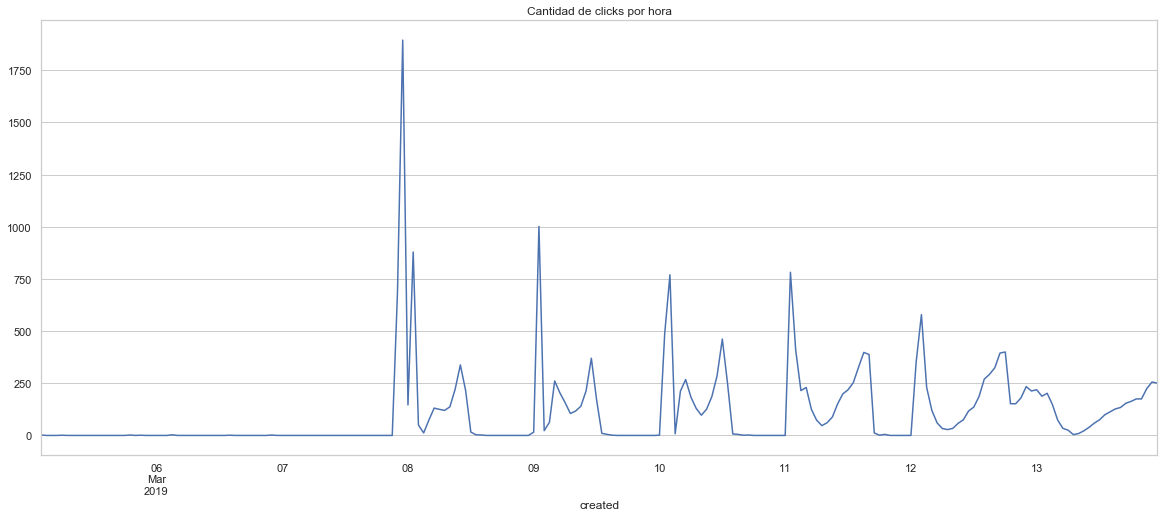

In [44]:
clicks_por_hora = clicks.resample('H').size()
clicks_por_hora.plot(kind='line', figsize=(20, 8), title='Cantidad de clicks por hora', grid=True);

In [46]:
def hourly_clicks_per_day(date, ax=None):
    clicks[date].resample('H').size()\
                  .plot(kind='line', figsize=(20, 8), title=date, ax=ax)

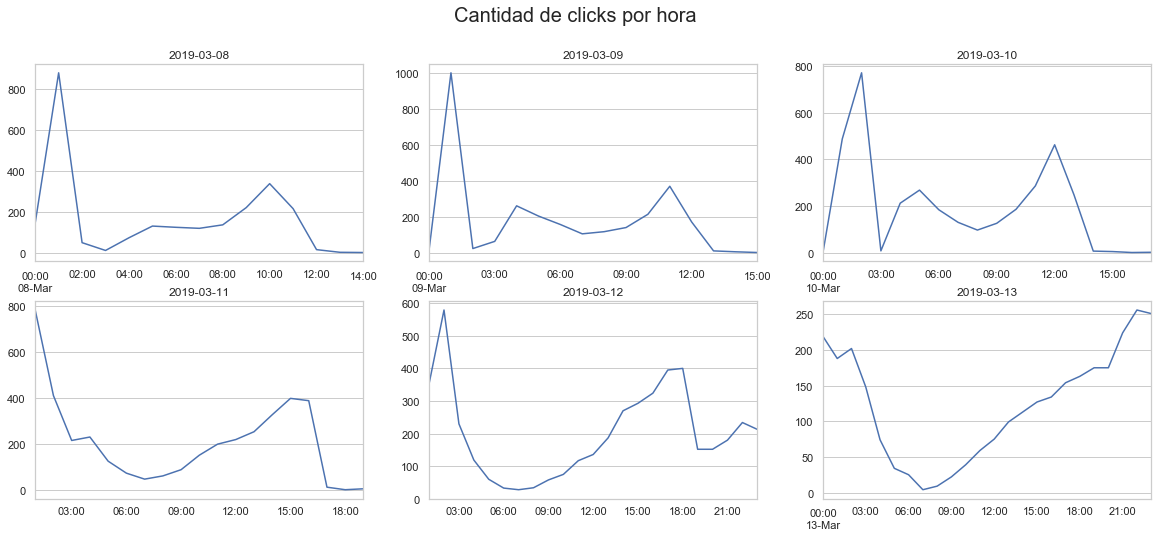

In [48]:
fig, ax_array = plt.subplots(2, 3, figsize=(20,8))
fig.suptitle('Cantidad de clicks por hora', size=20)

dates = ['2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13']
for day, ax in zip(dates, ax_array.flatten()):
    hourly_clicks_per_day(day, ax)
    ax.set_xlabel('')